<a href="https://colab.research.google.com/github/CoffeeM00d/vision-ai-project/blob/update_branch/feature_extraction/text_embedding_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with yours
data_path = "/content/drive/My Drive/VisionAI/Final_Project/"

Mounted at /content/drive


Extract Yelp Photo from .tar
- Only use to extract photos

In [ ]:
import tarfile
import os
archive_path = "/content/drive/My Drive/VisionAI/Final_Project/yelp_photos.tar"
extract_folder = "yelp-dataset"
destination_folder = os.path.join(data_path, extract_folder)

with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(destination_folder)

print(f"Archive '{archive_path}' extracted to '{destination_folder}' successfully.")

/tmp/ipython-input-2867361000.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(destination_folder)


Archive '/content/drive/My Drive/VisionAI/Final_Project/yelp_photos.tar' extracted to '/content/drive/My Drive/VisionAI/Final_Project/yelp-dataset' successfully.


# Program starts below

In [ ]:
import os
photo_path = "/content/drive/My Drive/VisionAI/Final_Project/yelp-dataset/photos"
# Assuming 'photo_path' is the directory where the images are stored
if os.path.exists(photo_path):
    num_files = len([f for f in os.listdir(photo_path) if os.path.isfile(os.path.join(photo_path, f))])
    print(f"Number of files in {photo_path}: {num_files}")
else:
    print(f"Directory not found: {photo_path}")

Number of files in /content/drive/My Drive/VisionAI/Final_Project/yelp-dataset/photos: 200098


# Data Preparation

In [ ]:
import numpy as np
import pandas as pd

import cv2
import os
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Read the photos.json file in /photos
photo_json_file = '/content/drive/My Drive/VisionAI/Final_Project/yelp_json/photos.json'
df_photos = pd.read_json(photo_json_file, lines=True)
display(df_photos.head())
print(f"Shape of the photos DataFrame: {df_photos.shape}")

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


Shape of the photos DataFrame: (200100, 4)


In [ ]:
# Read the entire JSON file without chunking
json_path = '/content/drive/My Drive/VisionAI/Final_Project/yelp_json'
for root, dirs, files in os.walk(json_path):
  for file in files:
    if file.endswith('.json'):
      df_file = pd.read_json(os.path.join(root, file), lines=True)
      print(f"json file name: {file}")
      display(df_file.head())
      print(f"Total number of images loaded: {len(df_file)}")


json file name: yelp_academic_dataset_business.json


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Total number of images loaded: 150346
json file name: yelp_academic_dataset_user.json


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


Total number of images loaded: 1987897
json file name: yelp_academic_dataset_checkin.json


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


Total number of images loaded: 131930
json file name: yelp_academic_dataset_tip.json


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Total number of images loaded: 908915
json file name: yelp_academic_dataset_review.json


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Total number of images loaded: 6990280
json file name: photos.json


,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


Total number of images loaded: 200100


In [ ]:
df_business = pd.read_json('/content/drive/My Drive/VisionAI/Final_Project/yelp_json/yelp_academic_dataset_business.json', lines=True)
display(df_business.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
df_tips = pd.read_json('/content/drive/My Drive/VisionAI/Final_Project/yelp_json/yelp_academic_dataset_tip.json', lines=True)
display(df_tips.head())

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


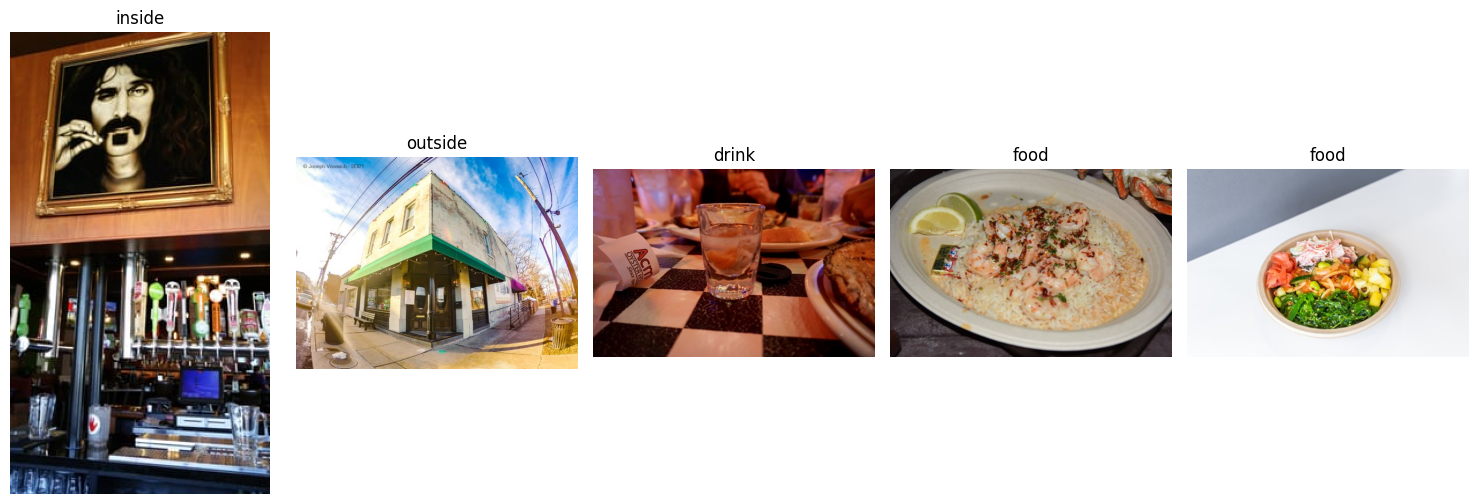

In [ ]:
# DIsplay first 5 rows from the dataframe
df_all_images = pd.read_json('/content/drive/My Drive/VisionAI/Final_Project/yelp_json/photos.json', lines=True)
first_5_images_df = df_all_images.head(5)

plt.figure(figsize=(15, 5))

for i, row in first_5_images_df.iterrows():
    photo_id = row['photo_id']
    image_file_path = os.path.join(photo_path, f"{photo_id}.jpg")

    # Check if the file exists before trying to read it
    if os.path.exists(image_file_path):
        image = cv2.imread(image_file_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 5, i + 1) # 1 row, 5 columns, current index
        plt.imshow(image_rgb)
        plt.title(row['label'])
        plt.axis('off')

    else:
        print(f"Image file not found: {image_file_path}")

plt.tight_layout()
plt.show()

In [ ]:
display(df_all_images.head(5))

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [ ]:
# match business_id to photos_id with matching business_id
df_photos_with_business = pd.merge(df_all_images, df_business, on='business_id', how='inner')
display(df_photos_with_business.head())
print(f"Shape of the merged DataFrame: {df_photos_with_business.shape}")

,photo_id,business_id,caption,label,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,-86.146407,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ..."
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside,Hogtown Smokehouse,6301 Clayton Ave,St. Louis,MO,63139,38.628715,-90.291415,4.5,67,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Barbeque, Sandwiches, American (Traditional), ...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-20:0'..."
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food,The Poké Company,"1208 E Kennedy Blvd, Ste 116",Tampa,FL,33602,27.951026,-82.447499,4.5,54,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsCre...","Restaurants, Vegan, Food, Ice Cream & Frozen Y...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


Shape of the merged DataFrame: (200100, 17)


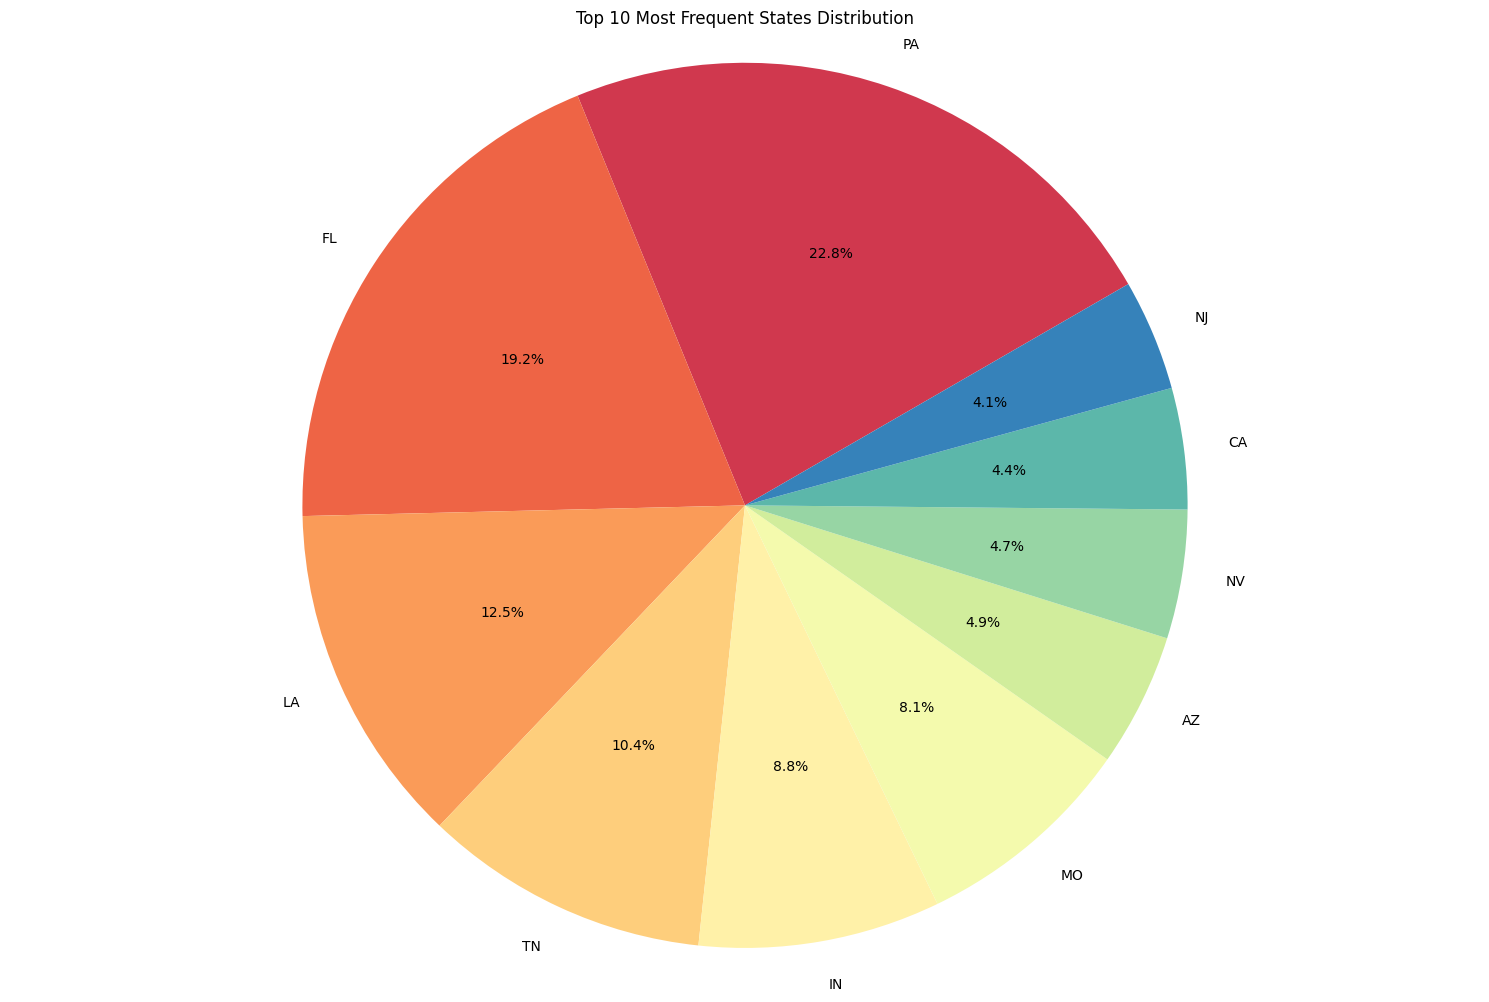

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each state
state_counts = df_photos_with_business['state'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Get the top 5 states for the pie chart
top_5_states = state_counts.head(10)

plt.figure(figsize=(15, 10))
plt.pie(top_5_states['Count'], labels=top_5_states['State'], autopct='%0.1f%%', startangle=30, colors=sns.color_palette('Spectral', n_colors=len(top_5_states)))
plt.title('Top 10 Most Frequent States Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
label_counts = df_photos_with_business['label'].value_counts()
display(label_counts)

,count
label,
food,108152
inside,56031
outside,18569
drink,15670
menu,1678


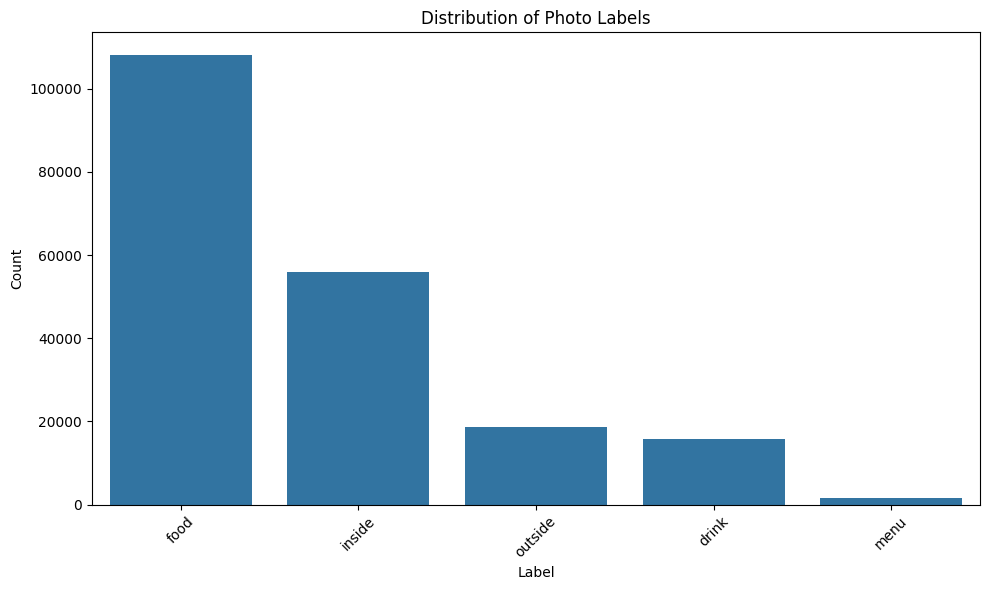

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Photo Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
unique_categories = df_photos_with_business['categories'].unique()
print(unique_categories)
print(len(unique_categories))

['Restaurants, Pubs, Nightlife, American (Traditional), Bars, Beer Bar, Burgers'
 'Barbeque, Sandwiches, American (Traditional), Restaurants'
 'Live/Raw Food, Seafood, Restaurants, Cajun/Creole' ...
 'Nightlife, Pubs, Event Planning & Services, Hotels, Bars, Hotels & Travel'
 'Tapas Bars, Spanish, Tapas/Small Plates, Restaurants'
 'Italian, American (Traditional), Sandwiches, Restaurants, Food, Pizza']
25467


In [ ]:
from collections import Counter
import itertools

# Split categories
all_categories = df_photos_with_business['categories'].dropna().apply(lambda x: [cat.strip() for cat in x.split(',')])
flat_categories = list(itertools.chain.from_iterable(all_categories))
category_counts = Counter(flat_categories)
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 20 categories
display(category_counts_df.head(20))

,Category,Count
0,Restaurants,170467
14,Food,79703
2,Nightlife,61063
4,Bars,57474
3,American (Traditional),38406
23,American (New),37224
24,Breakfast & Brunch,33819
8,Sandwiches,25669
18,Coffee & Tea,23517
10,Seafood,21701


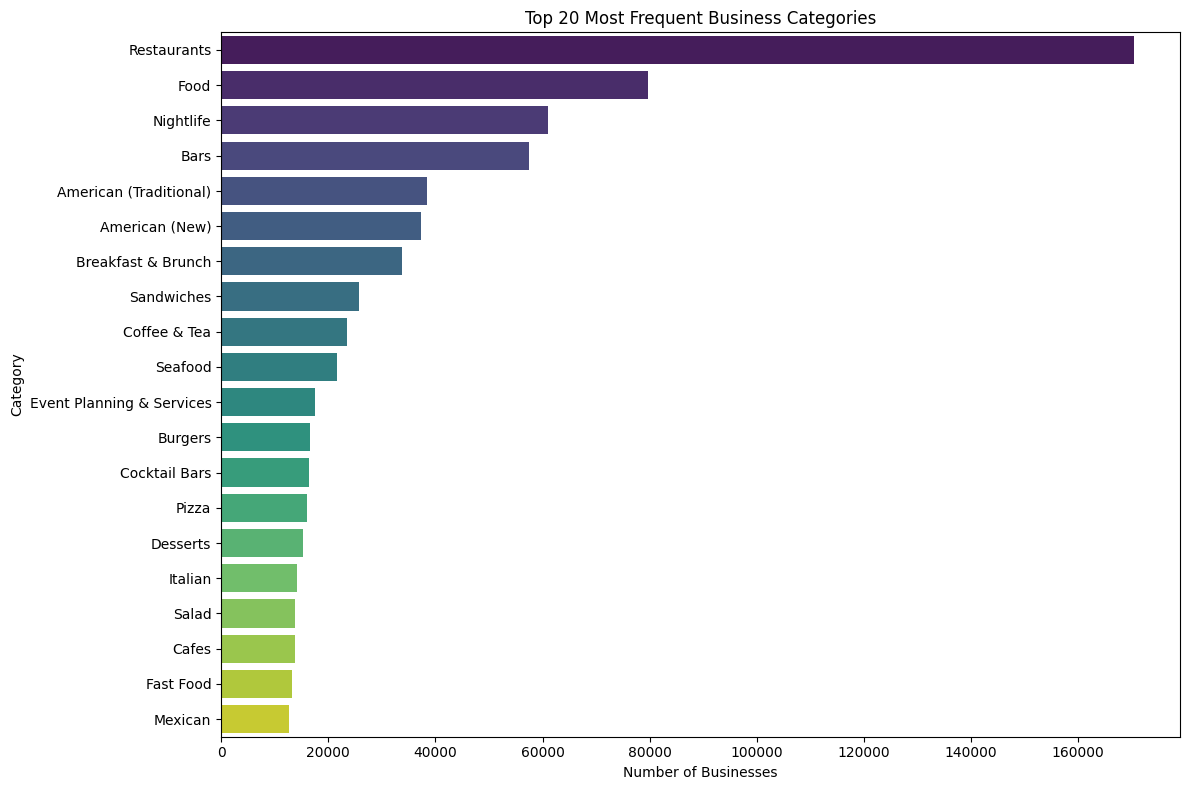

In [ ]:
from collections import Counter
import itertools

# Split categories and flatten the list
all_categories = df_photos_with_business['categories'].dropna().apply(lambda x: [cat.strip() for cat in x.split(',')])
flat_categories = list(itertools.chain.from_iterable(all_categories))

# Count the occurrences of each category
category_counts = Counter(flat_categories)

# Convert to a DataFrame for easier plotting and get the top N categories
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Category', hue='Category', data=category_counts_df.head(20), palette='viridis', legend=False)
plt.title('Top 20 Most Frequent Business Categories')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [ ]:
# getting specifically restaurant category
df_restaurants = df_photos_with_business[df_photos_with_business['categories'].str.contains('Restaurants', na=False)]

display(df_restaurants.head())
print(f"Shape of the new Restaurants DataFrame: {df_restaurants.shape}")

,photo_id,business_id,caption,label,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,-86.146407,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ..."
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside,Hogtown Smokehouse,6301 Clayton Ave,St. Louis,MO,63139,38.628715,-90.291415,4.5,67,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Barbeque, Sandwiches, American (Traditional), ...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-20:0'..."
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food,The Poké Company,"1208 E Kennedy Blvd, Ste 116",Tampa,FL,33602,27.951026,-82.447499,4.5,54,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsCre...","Restaurants, Vegan, Food, Ice Cream & Frozen Y...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


Shape of the new Restaurants DataFrame: (170467, 17)


In [ ]:
# getting specifically restaurant category
df_food = df_photos_with_business[df_photos_with_business['categories'].str.contains('Food', na=False)]

display(df_food.head())
print(f"Shape of the new Food DataFrame: {df_food.shape}")

,photo_id,business_id,caption,label,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food,The Poké Company,"1208 E Kennedy Blvd, Ste 116",Tampa,FL,33602,27.951026,-82.447499,4.5,54,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsCre...","Restaurants, Vegan, Food, Ice Cream & Frozen Y...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
11,yED5k8-aiPcgiUKoPRfJgg,GMVFik6o0Kh38ztkCkFi8g,,inside,Moonlight Boba,"6251 US Hwy 19 N, Ste 102-103",Pinellas Park,FL,33781,27.828897,-82.679151,4.5,111,1,"{'BusinessParking': '{'garage': False, 'street...","Bubble Tea, Food, Asian Fusion, Sandwiches, Re...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
12,Le9rMdT8YFlvqr431LctIQ,BELS5YkYjDFkpbM2FuDdaA,Fried Chick'un Sandwich,food,Nourish,943 S 9th St,Philadelphia,PA,19147,39.937838,-75.157990,4.5,90,1,"{'NoiseLevel': 'u'average'', 'BusinessAcceptsC...","Food, Juice Bars & Smoothies, Vegan, Breakfast...","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."


Shape of the new Food DataFrame: (93843, 17)


# Using business 'name' from df_photos_with_business as caption for the CLIP model


In [ ]:
IMAGE_SIZE = [224, 224]
IMAGE_SIZE[0], IMAGE_SIZE[1]

(224, 224)

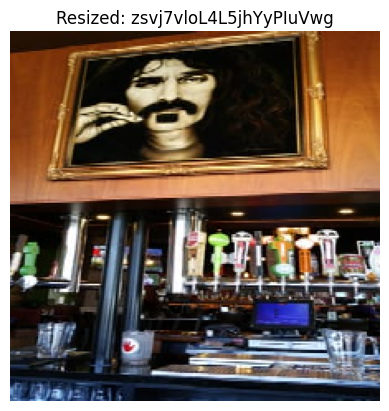

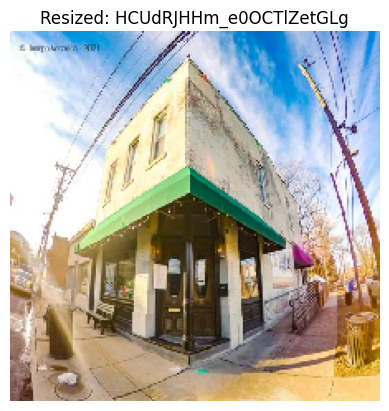

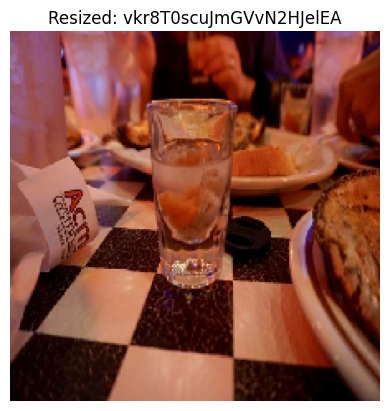

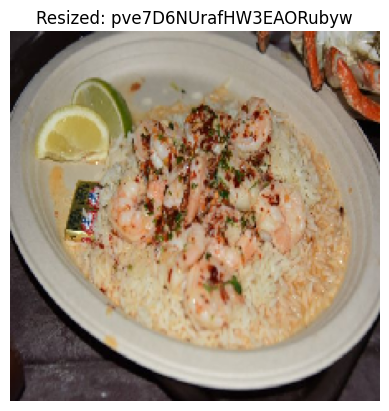

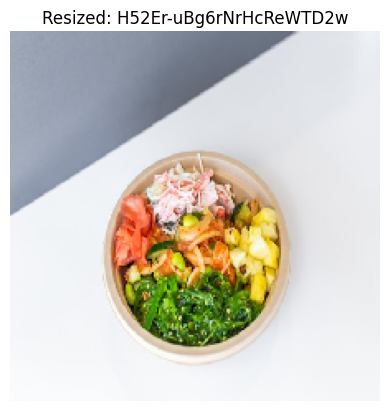

Successfully resized 5 images.


In [ ]:
resized_images = []

for i, row in df_photos_with_business.head(5).iterrows(): # Process only the first 5 images for demonstration
    photo_id = row['photo_id']
    image_file_path_df = os.path.join(photo_path, f"{photo_id}.jpg")
    img_raw = cv2.imread(image_file_path_df)

    if img_raw is not None:
        resized_img = cv2.resize(img_raw, dsize=(IMAGE_SIZE[0], IMAGE_SIZE[1]), interpolation = cv2.INTER_NEAREST)
        resized_images.append(resized_img)
        img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"Resized: {photo_id}")
        plt.axis('off')
        plt.show()

    else:
        print(f"Warning: Image file not found or could not be read: {image_file_path_df}")

print(f"Successfully resized {len(resized_images)} images.")

In [ ]:
# Combine business name, id and tips text
df_with_tips = pd.merge(df_photos_with_business, df_tips, on='business_id', how='inner')
display(df_with_tips.head())
print(f"Shape of the merged DataFrame: {df_with_tips.shape}")

,photo_id,business_id,caption,label,name,address,city,state,postal_code,latitude,...,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,...,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...",0PEMLNdfaKKr8NO02yPaTw,CRACKFRIES! So good. They have a good menu sel...,2016-01-11 02:01:43,0
1,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,...,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...",D-wx1JIbf3_D-e09VSWzSQ,Always great service and always great food!,2015-03-22 01:43:15,0
2,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,...,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...",Jr2yFP6-dPCY4WW0Vk8DNQ,So many Belgians to choose from!,2014-10-08 21:04:32,0
3,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,...,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...",HXoj_z9MJAYCFSeiKavvHg,Go during the day on the weekends. Weekend ni...,2015-03-08 21:50:43,0
4,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,HopCat - Broad Ripple,"6280 N College Ave, Ste 700",Indianapolis,IN,46220,39.869451,...,3.5,657,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Restaurants, Pubs, Nightlife, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...",PEOL3XEpv_e5h5l_8aYFvQ,Everything is good!,2017-03-31 17:30:54,0


Shape of the merged DataFrame: (9833781, 21)


In [ ]:
#Extract name-text into a dictionary as image description
business_tips_dict = {}
for name, group in df_with_tips.groupby('name'):
    business_tips_dict[name] = group['text'].tolist()

print(f"Created a dictionary with {len(business_tips_dict)} unique businesses.")
# Display the first few entries to verify
for i, (business_name, tips) in enumerate(business_tips_dict.items()):
    if i >= 5: # Display first 5 entries
        break
    print(f"\nBusiness Name: {business_name}")
    print(f"Tips: {tips[:3]}...") # Display first 3 tips for brevity

Created a dictionary with 24064 unique businesses.

Business Name: "Genuino" Italian Cafe'
Tips: ['Great little spot!!!', 'Great place for real Italian coffee and sandwiches- try the Parma!', "Want a tip? Don't eat here."]...

Business Name: #1 Mongolian BBQ - Best Stir Fried Noodles In Boise
Tips: ["Get an extra bowl of sauce in addition to your regular bowl. The cooks ask you to do this if you don't have enough sauce. I swear, this small detail makes this place better than the other M-BBQ places in the valley. Your dinner tastes so much better!", 'The place is very dirty.', 'Best food ever. Love it! Everything is perfet!']...

Business Name: &pizza - UPenn
Tips: ['You can do large group orders here as well! Call/email ahead', 'This is the Chipotle of pizzas. Very good options and you can make your own.', 'Great pizza choices with fresh toppings! They also gave gluten free pizza choice and other organic options. The worker was very helpful in helping me select what I was craving at th

In [ ]:
df_business_tips = pd.DataFrame(business_tips_dict.items(), columns=['name', 'tips'])
display(df_business_tips.head())
print(f"Shape of the new business tips DataFrame: {df_business_tips.shape}")

,name,tips
0,"""Genuino"" Italian Cafe'","[Great little spot!!!, Great place for real It..."
1,#1 Mongolian BBQ - Best Stir Fried Noodles In ...,[Get an extra bowl of sauce in addition to you...
2,&pizza - UPenn,[You can do large group orders here as well! C...
3,&pizza - Walnut,[&Pizza will be selling Milk Bar's Cereal Milk...
4,'O' Bar + Kitchen,[Phenomenal food and drinks! Shrimp tacos and ...


Shape of the new business tips DataFrame: (24064, 2)


In [ ]:
# Do feature extraction for text inputs
from transformers import pipeline
df_business_tips_feature = df_business_tips.copy()
feature_extractor = pipeline("feature-extraction", model="bert-base-uncased", framework="pt")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
text_embeddings = feature_extractor(df_business_tips_feature['tips'].tolist(), truncation=True, return_tensors="pt")

In [ ]:
print("BERT embedding for the text:\n", text_embeddings)

Streaming output truncated to the last 5000 lines.
         [ 1.0648, -0.6549,  0.0974,  ..., -0.5350, -0.3939, -0.8691],
         [-0.6205, -0.9813, -0.2948,  ...,  0.7183,  0.0391, -0.7518],
         [ 0.6140,  0.2172, -0.3640,  ..., -0.0622, -0.3648, -0.1600]]]), tensor([[[-0.7740, -0.3739, -0.5807,  ..., -0.5364,  0.9511,  0.3407],
         [ 0.4614,  0.3596, -0.3050,  ...,  0.2239,  0.4804, -0.2270],
         [ 0.2442, -1.0705, -0.3976,  ...,  0.2846,  0.7517, -0.4254],
         ...,
         [-0.0290,  0.1087, -0.0907,  ...,  0.2194,  0.0561, -0.5381],
         [-0.7186, -1.0296, -0.0678,  ...,  1.0008,  0.4310, -0.6787],
         [ 0.5740,  0.2030, -0.4885,  ...,  0.1245, -0.3039, -0.2534]]]), tensor([[[-0.2118, -0.0863,  0.4476,  ..., -0.3660,  0.4878,  0.1805],
         [-0.8028,  0.0528,  0.5186,  ...,  0.6093,  1.4703,  0.0949],
         [-0.6081, -0.2511, -0.2104,  ...,  0.3613,  0.8212, -0.2775],
         ...,
         [ 0.4639, -0.5951,  0.1417,  ...,  0.1647,  0.3604, -0

In [ ]:
print(f"Shape of the first BERT embedding: {text_embeddings[0].shape}")

Shape of the first BERT embedding: torch.Size([1, 512, 768])
